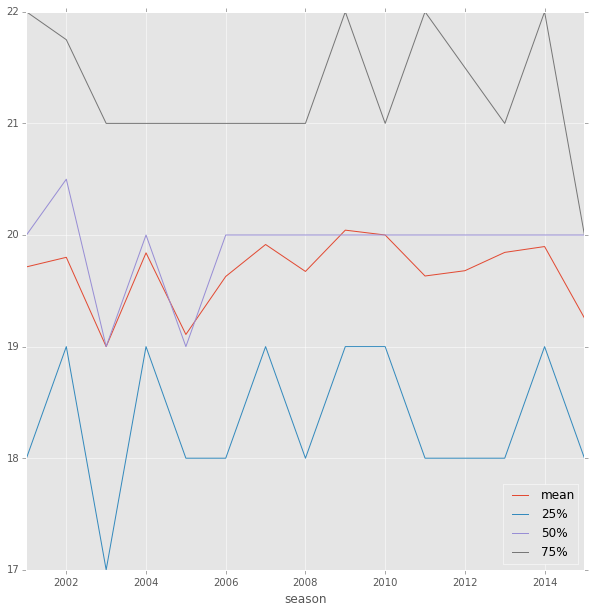

In [22]:
big5leagues=['GB1','FR1','L1','IT1','ES1']
big5countries=['England','France','Germany','Italy','Spain']
t=nonloans[nonloans.season>2000]
t[(t.toLeague.isin(['RO1']))&(t.fromLeague!=t.toLeague)&(t.age<23)].drop_duplicates('id').groupby('season')['age'].describe() \
 .unstack().drop(['count','std','min','max'],axis=1).plot.line(figsize=(10,10))

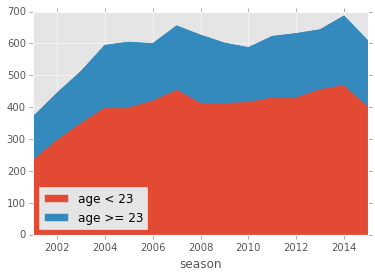

In [37]:
big5leagues=['GB1','FR1','L1','IT1','ES1']
big5countries=['England','France','Germany','Italy','Spain']
leagues=big5leagues
tier3=countryInfo[countryInfo.marketTier==3].index
tier2=countryInfo[countryInfo.marketTier==2].index

tier1=countryInfo[countryInfo.marketTier==1].index

#leagues=['RO1']

t=nonloans[nonloans.season>2000]
t
under=t[(t.toLeague.isin(leagueList))&(t.toCountry.isin(tier2))&(t.fromLeague!=t.toLeague)&(t.fromCountry==t.toCountry)&(t.toCountry.isin(uefa))&(t.age<23)].drop_duplicates('id').groupby('season')['id'].count()
over=t[(t.toLeague.isin(leagueList))&(t.toCountry.isin(tier2))&(t.fromLeague!=t.toLeague)&(t.fromCountry==t.toCountry)&(t.toCountry.isin(uefa))&(t.age>=23)].drop_duplicates('id').groupby('season')['id'].count()

df=DataFrame({'age < 23':under,'age >= 23':over})
df['youth %']=df['age < 23'] / (df['age < 23'] + df['age >= 23'])
df[['age < 23','age >= 23']].plot.area(stacked=True)
#df['youth %'].plot.line()

In [ ]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.intlCaps>0)&(t.Nationality=='Brazil')]
t=t.merge(DataFrame({'toMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='toCountry',right_index=True)
t.groupby(['season','toMarketTier']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

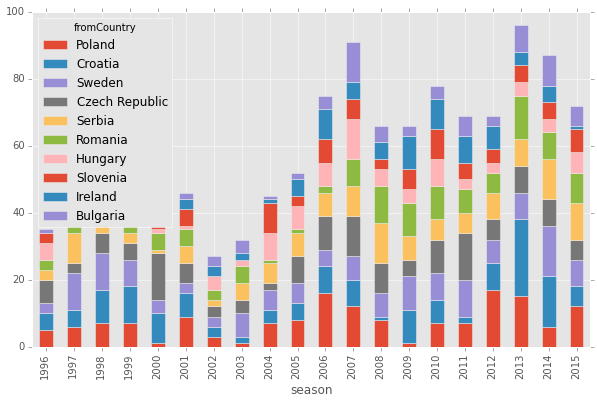

In [143]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())&(t.intlCaps>0)]
t=t.merge(DataFrame({'toMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='toCountry',right_index=True)
t=t.merge(DataFrame({'fromMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='fromCountry',right_index=True)
t=t[(t.fromMarketTier==3)&(t.toMarketTier==1)]
s=t.groupby(['season','fromCountry']).count()['id'].unstack()
s[s.sum().sort_values(ascending=False)[:10].index].plot.bar(stacked=True,figsize=(10,6))

In [23]:
t=nonloans
t=t[(t.season>1995)&(t.toCountry.notnull())&t.feeValue>0]
t=t.merge(DataFrame({'toMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='toCountry',right_index=True)
t=t.merge(DataFrame({'fromMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='fromCountry',right_index=True)
s=t.groupby(['season','fromMarketTier']).sum()['feeValue'].unstack()
s[s.sum().sort_values(ascending=False).index] #.plot.bar(stacked=True,figsize=(10,6))

fromMarketTier,1.0,2.0,CONMEBOL,3.0,CONCACAF,4.0,AFC,CAF
season,,,,,,,,
1996,3.159290e+08,7.971900e+07,69920000.0,29184000.0,840000.0,9640000.0,650000.0,1975000.0
1997,5.480190e+08,1.167840e+08,85870000.0,20635000.0,5910000.0,8130000.0,1075000.0,155000.0
1998,7.075400e+08,2.094590e+08,82585000.0,65815000.0,4375000.0,8580000.0,4850000.0,2735000.0
1999,9.875340e+08,2.335030e+08,149776000.0,62535000.0,11210000.0,17110000.0,375000.0,2230000.0
2000,1.309456e+09,3.151000e+08,198580000.0,105001000.0,8550000.0,19430000.0,6115000.0,3320000.0
2001,1.560095e+09,3.204900e+08,214195000.0,97462000.0,9250000.0,8570000.0,13910000.0,2490000.0
2002,8.446310e+08,1.654310e+08,107120000.0,45488000.0,1100000.0,6230000.0,15000000.0,4755000.0
2003,7.120310e+08,2.040300e+08,129860000.0,121602000.0,9250000.0,5470000.0,5625000.0,8525000.0
2004,9.662100e+08,3.421090e+08,177115000.0,68965000.0,18875000.0,17488000.0,6790000.0,7328000.0


In [26]:
countryInfo.groupby('marketTier').count()

,federation
marketTier,
1.0,5
2.0,11
3.0,23
4.0,30


In [27]:
585.845068 / 366
739.324534 / 366
#tier3
#s=t.groupby(['season','fromMarketTier']).sum()['feeValue'].unstack()
3057280000 / 161906000.0 

18.883055600163058

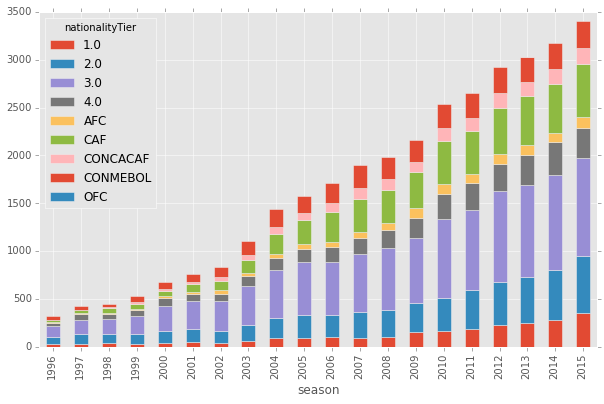

In [127]:
t=nonloans
t=t[(t.season>1995)&(t.toCountry.notnull())&(t.age>21)&(t.toCountry!=t.fromCountry)&(t.intlCaps>0)]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t.groupby(['season','nationalityTier']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

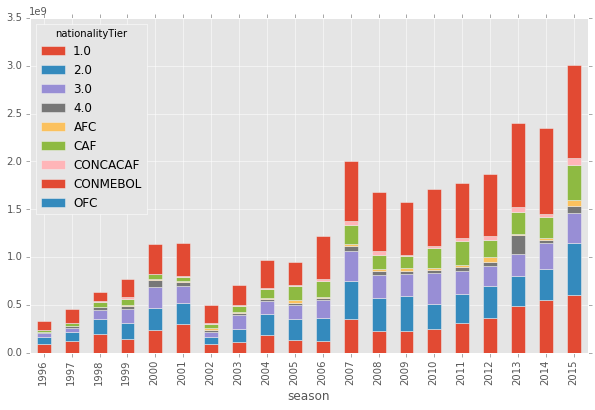

In [122]:
t=nonloans
t=t[(t.season>1995)&(t.toCountry.notnull())&(t.toCountry!=t.fromCountry)]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t.groupby(['season','nationalityTier']).sum()['feeValue'].unstack().plot.bar(stacked=True,figsize=(10,6))

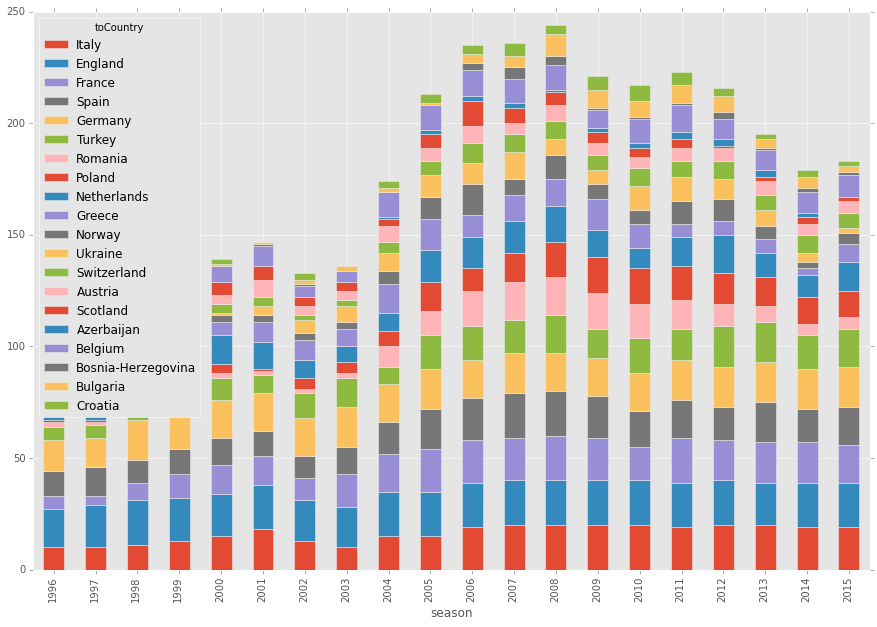

In [91]:
t=nonloans[(nonloans.feeValue>0)&(nonloans.toLeague.isin(leagueList))&(nonloans.season>1995)]
s=t.groupby(['season','toCountry'])['toTeamId'].nunique().unstack()
s[s.quantile(.8).sort_values(ascending=False)[:20].index].plot.bar(stacked=True,figsize=(15,10))


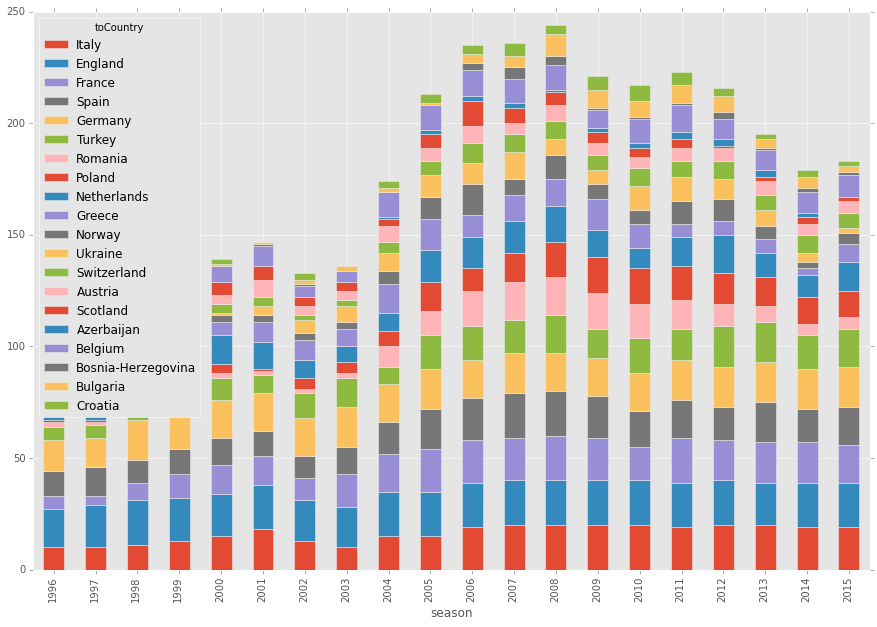

In [91]:
t=nonloans[(nonloans.feeValue>0)&(nonloans.toLeague.isin(leagueList))&(nonloans.season>1995)]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
s[s.quantile(.8).sort_values(ascending=False)[:20].index].plot.bar(stacked=True,figsize=(15,10))


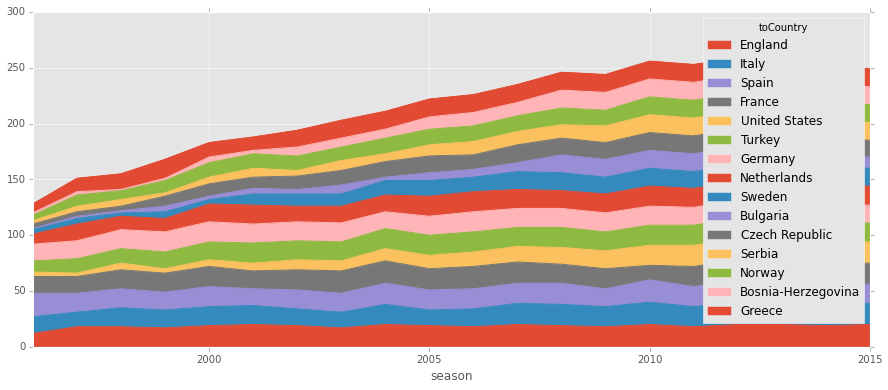

In [88]:
t=nonloans[(nonloans.toCountry!=nonloans.fromCountry)&(nonloans.toLeague.isin(leagueList))&(nonloans.season>1995)]
s=t.groupby(['season','toCountry'])['toTeamId'].nunique().unstack()
s[s.quantile(.8).sort_values(ascending=False)[:15].index].plot.area(stacked=True,figsize=(15,6))


/Users/sunkevin/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:714: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


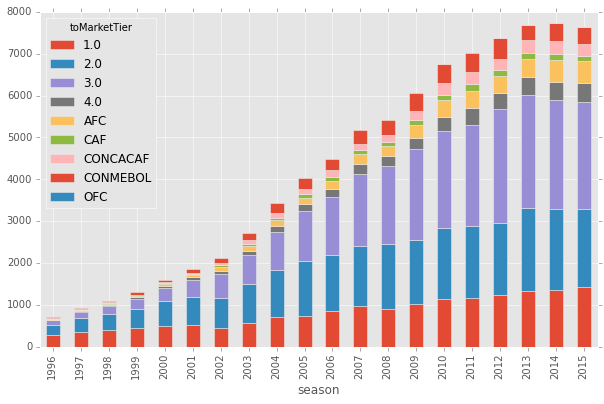

In [2]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t=t.merge(DataFrame({'toMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='toCountry',right_index=True)
tt=t[t.nationalityTier=='CAF']
tt=t#[(t.fromCountry=='Greece')&(t.nationalityTier==3)]
tt.groupby(['season','toMarketTier']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

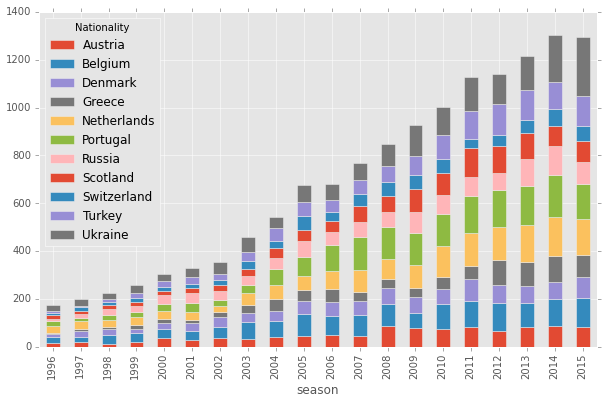

In [39]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t=t[t.nationalityTier==2]
t.groupby(['season','Nationality']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

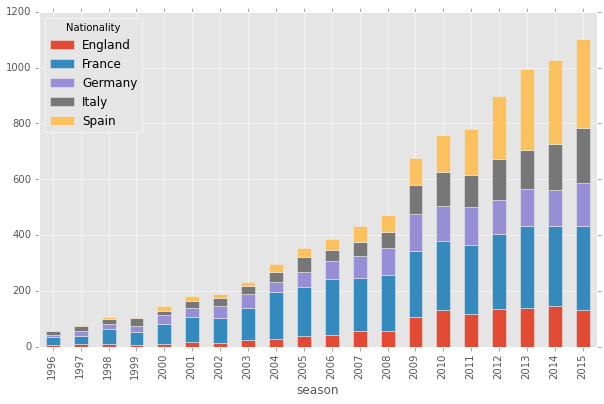

In [40]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t=t[t.nationalityTier==1]
t.groupby(['season','Nationality']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

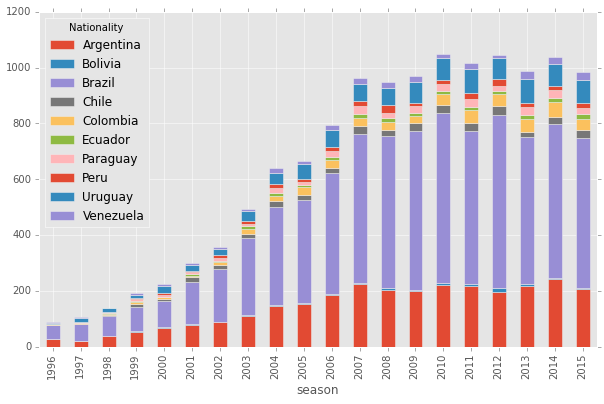

In [42]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t=t[t.nationalityTier=='CONMEBOL']
t.groupby(['season','Nationality']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

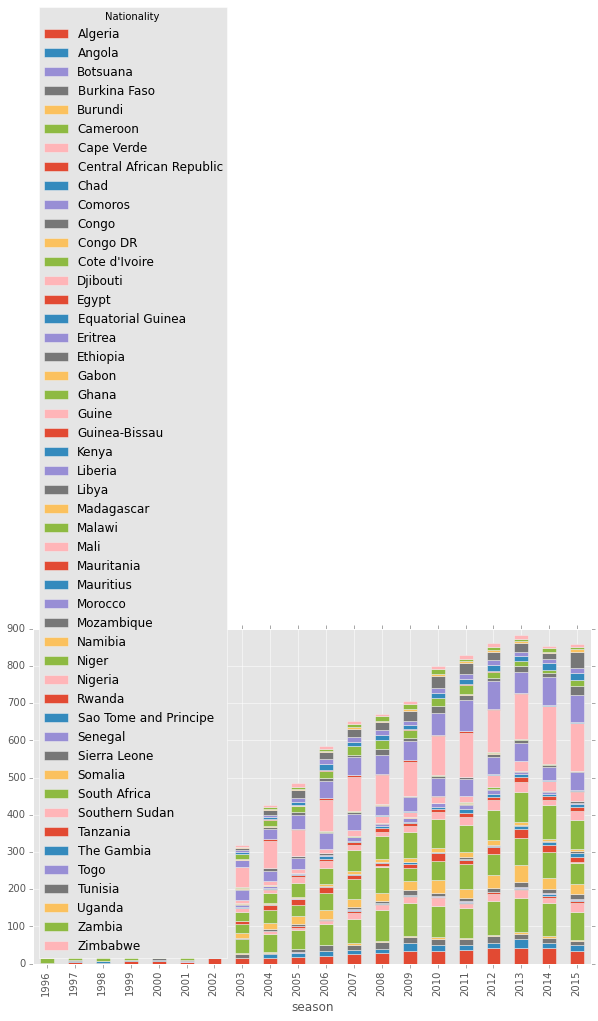

In [43]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t=t[t.nationalityTier=='CAF']
t.groupby(['season','Nationality']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

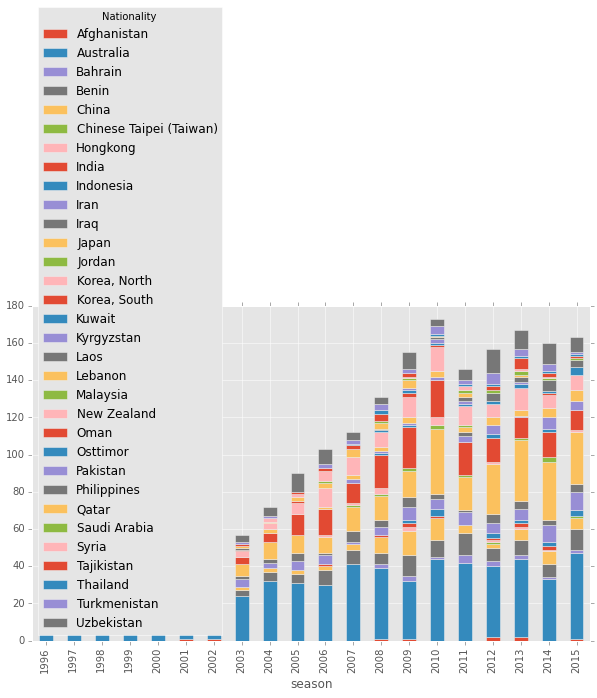

In [44]:
t=nonloans
t=t[(t.season>1995)&(t.fromCountry!=t.toCountry)&(t.toCountry.notnull())]
t=t.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
t=t[t.nationalityTier=='AFC']
t.groupby(['season','Nationality']).count()['id'].unstack().plot.bar(stacked=True,figsize=(10,6))

In [8]:
DataFrame({'toMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)})

,toMarketTier
country,
Afghanistan,AFC
Albania,UEFA
Algeria,CAF
American Samoa,CONCACAF
Andorra,UEFA
Angola,CAF
Antigua and Barbuda,CONCACAF
Argentina,CONMEBOL
Armenia,UEFA


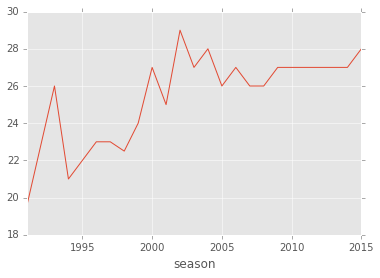

In [64]:
t=transfers[transfers.toTeamName=='Unattached']
t.groupby('season')['age'].median().plot.line()

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers_q.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1','IR1']

countryInfo=pd.read_excel('../data/reference/countries.xls').set_index('country')

top20clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:20].index
top50clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:50].index
top100clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:100].index

uefa=countryInfo[countryInfo.federation=='UEFA'].index
caf=countryInfo[countryInfo.federation=='CAF'].index
concacaf=countryInfo[countryInfo.federation=='CONCACAF'].index
concacaf_no_uscan=countryInfo[countryInfo.federation=='CONCACAF'].drop(['United States','Canada']).index
conmebol=countryInfo[countryInfo.federation=='CONMEBOL'].index
afc=countryInfo[countryInfo.federation=='AFC'].index
afc_no_anzac=countryInfo[countryInfo.federation=='AFC'].drop(['Australia','New Zealand']).index

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (0,38,40,41,45,47,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (40,45,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False